`matplotlib` is the main library which provides plotting/graphing functionalities for Python. `seaborn` is a library built on top of matplotlib which adds more types of charts, fancier graphics and more "object-orientedness".
These libraries are useful for visualizing data in machine learning.

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Let's have a look at some visualizations. We will first use the _Iris_ dataset, which is a well-known classic dataset that is easy to visualize.

In [133]:
from sklearn import datasets

# this call will return a data object which contains data point values and metadata for this dataset about Iris flowers.
# see https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = datasets.load_iris()
print('Attributes of the data object: ', dir(iris))
print('Shape of this data (rows x columns = instances x features): ', iris.data.shape)
print(iris.target_names)

Attributes of the data object:  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Shape of this data (rows x columns = instances x features):  (150, 4)
['setosa' 'versicolor' 'virginica']


As we have seen above, this data has four features. The task is classification and the target is the species of the iris flower. Let's try to visualize their correlation

In [134]:
# in order to better work with this data, we can convert it to a pandas dataframe.
import pandas as pd
import numpy as np

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


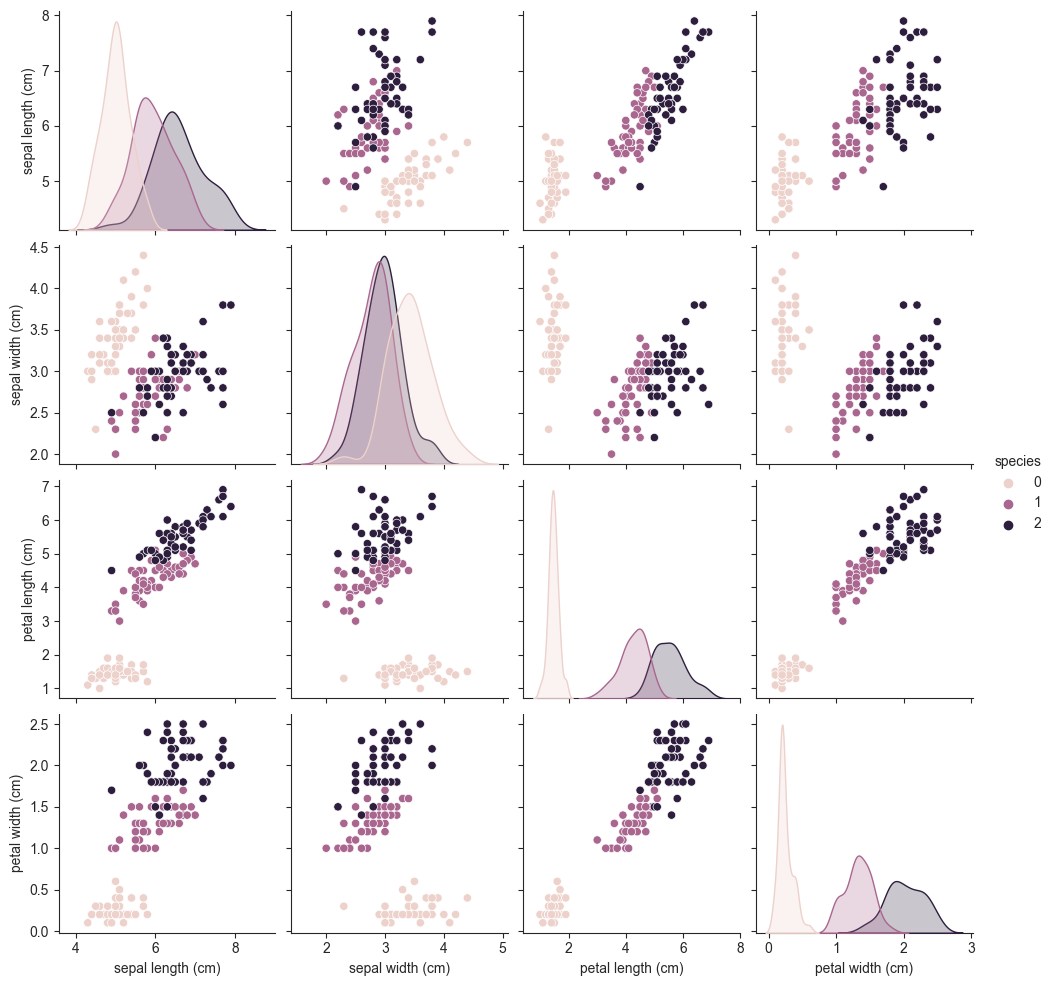

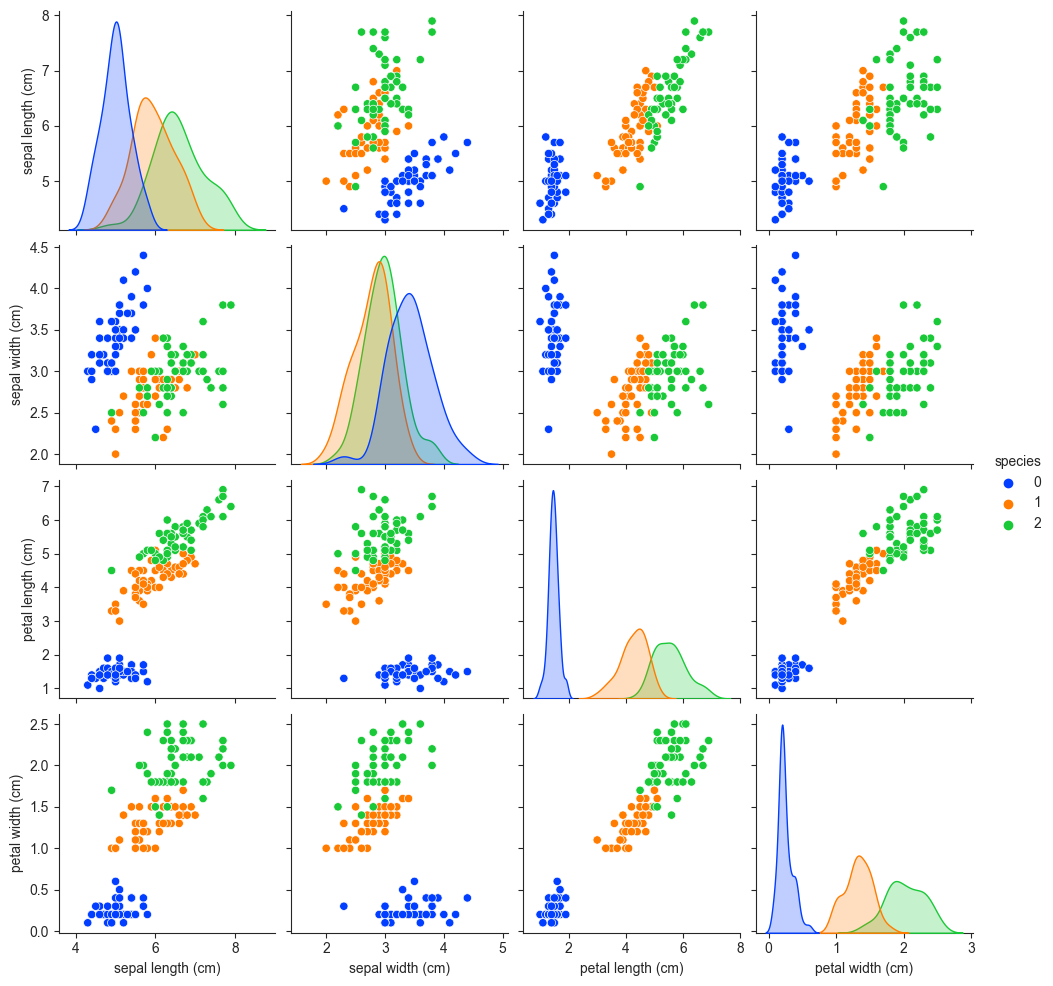

In [135]:
sns.set_style('ticks')
sns.pairplot(data=df, hue='species')

# we could also change the color palette
# https://seaborn.pydata.org/tutorial/color_palettes.html

sns.pairplot(data=df, hue='species', palette='bright', diag_kind='kde')


Another advantage of pandas data frames is that we can easily visualize statistics about the data:

In [136]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can even visualize the correlation matrix

<Axes: >

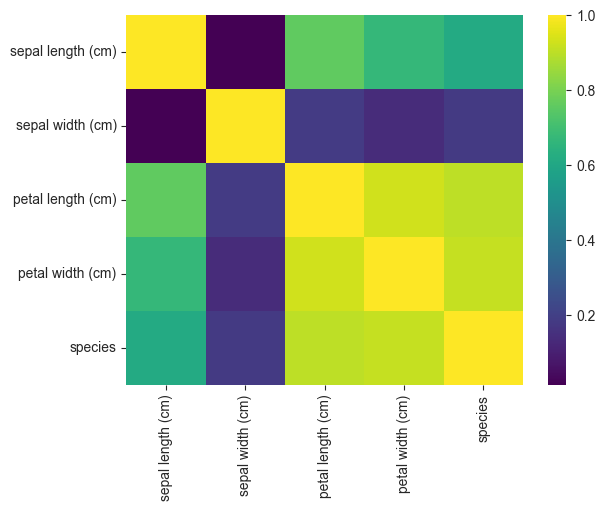

In [137]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix
sns.heatmap(correlation_matrix ** 2, cmap='viridis')

Now let's try a different dataset! Aside from all the datasets available in `sklearn.datasets`, we have some additional ones in `seaborn` that can be loaded with `sns.load_dataset()`.
Seaborn will return a dataframe so it's easier to use.

In [138]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Let's visualize this data!

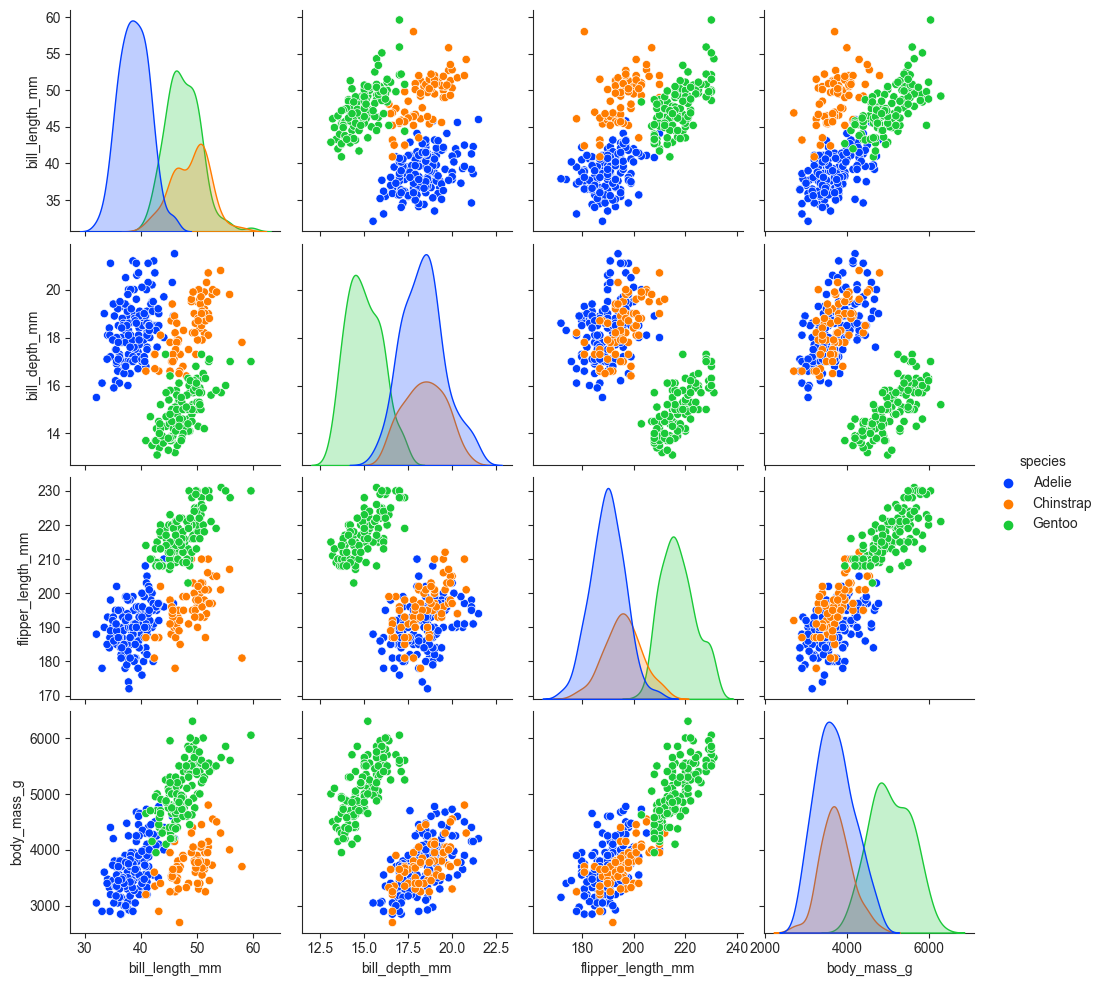

In [139]:
sns.pairplot(data=penguins, hue='species', palette='bright')

Let's also check the correlation matrix!

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
species                    0.956547  1.000000  


<Axes: >

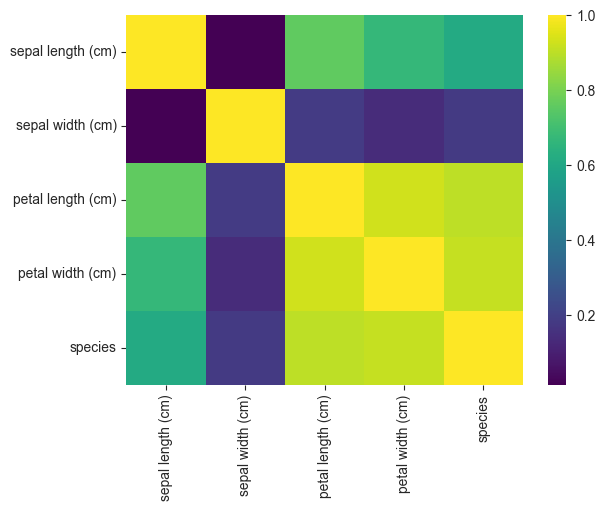

In [140]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
sns.heatmap(correlation_matrix ** 2, cmap='viridis')

One thing we do notice about the data -- it contains NaN values! Let's get rid of them

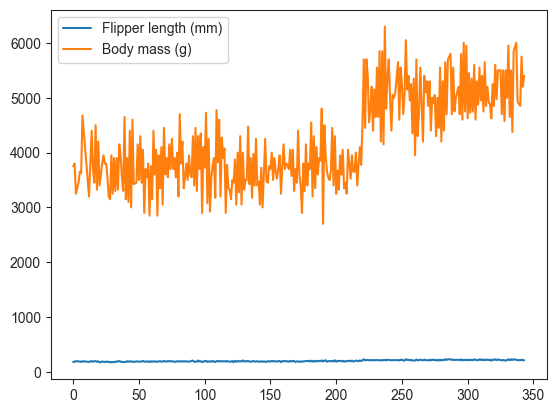

In [142]:
df = penguins.dropna(how='any') # drop row if any value is NaN

fig, ax = plt.subplots()
ax.plot(df['flipper_length_mm'], label='Flipper length (mm)')
ax.plot(df['body_mass_g'], label='Body mass (g)')
ax.legend()

$x$ is flipper length and $y$ is body mass. How can we scale $x$ to be in the same range of $y$?
$$
    x' = m \cdot x + c
$$

In [149]:
corr = np.corrcoef(df['flipper_length_mm'], df['body_mass_g'])[0][1]
corr

0.872978898565361

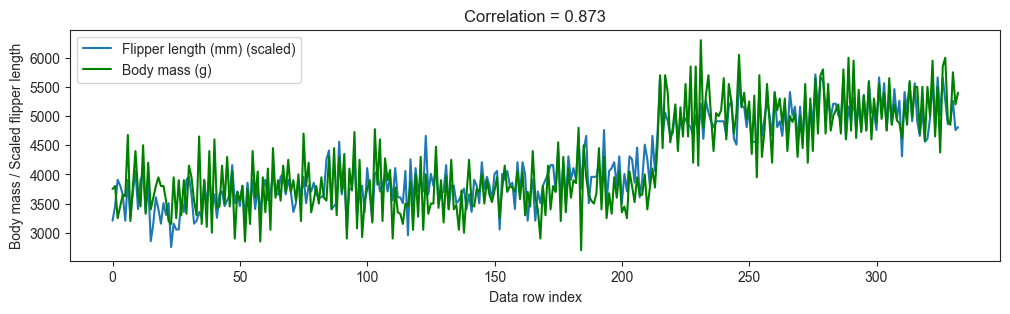

In [154]:
x = df['flipper_length_mm'].values
y = df['body_mass_g'].values

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(m * x + c, label='Flipper length (mm) (scaled)')
ax.plot(y, label='Body mass (g)', color='orange')
ax.set_title(f'Correlation = {corr:.3f}')
ax.set_xlabel('Data row index')
ax.set_ylabel('Body mass / Scaled flipper length')
ax.legend()